In [11]:
import pandas as pd
import numpy as np
from anndata import AnnData
import scanpy as sc
import scipy.sparse as sp
import glob
from tqdm import tqdm

import torch

In [13]:
l = torch.nn.Linear(20,20)
l.to('cuda')

Linear(in_features=20, out_features=20, bias=True)

In [14]:
h5ad_dic = '/home/hanyuji/Data/ST_data/macaque_cortex/h5ad/'
files = 'total_gene_T25.type20230503-macaque1-contour2.h5ad'
data_index = [25,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,45,47]

adatas = []
for index in tqdm(data_index):
    data_path = h5ad_dic + f'total_gene_T{index}.type20230503-macaque1-contour2.h5ad'
    adata = sc.read_h5ad(data_path)
    adatas.append(adata)

100%|██████████| 20/20 [01:17<00:00,  3.89s/it]


In [20]:
list(range(1,len(adatas)+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [21]:
adata_merged = sc.concat(
    adatas,
    join='outer',  # 使用'outer'合并变量（基因），缺失的数据会用0填充
    keys=list(range(1,len(adatas)+1)),
    index_unique='-'
)

In [22]:
# 在obs中添加'slice'列来标记切片编号
adata_merged.obs['slice'] = adata_merged.obs_names.str.split('-').str.get(1)
adata_merged.obs['slice'] = adata_merged.obs['slice'].astype(int)

z_values = adata_merged.obs['slice'].values.reshape(-1, 1)
# 更新adata_merged.obsm['spatial']以包括新的列
adata_merged.obsm['spatial'] = np.hstack((adata_merged.obsm['spatial'], z_values))

In [30]:
adata_merged.obsm['spatial']

array([[3.02190e+04, 4.14860e+04, 2.64950e+04, 7.87680e+04, 1.00000e+00],
       [4.55070e+04, 8.26150e+04, 2.45840e+04, 3.49270e+04, 1.00000e+00],
       [4.24460e+04, 4.80580e+04, 1.68630e+04, 6.87380e+04, 1.00000e+00],
       ...,
       [5.03780e+04, 4.75740e+04, 2.37350e+04, 7.96870e+04, 2.00000e+01],
       [5.47840e+04, 5.12560e+04, 1.93360e+04, 7.60150e+04, 2.00000e+01],
       [1.34710e+04, 1.13638e+05, 6.06520e+04, 1.36350e+04, 2.00000e+01]])

In [31]:
coo = pd.DataFrame(adata_merged.obsm['spatial'])
coo

,0,1,2,3,4
0,30219.0,41486.0,26495.0,78768.0,1.0
1,45507.0,82615.0,24584.0,34927.0,1.0
2,42446.0,48058.0,16863.0,68738.0,1.0
3,47325.0,43145.0,10723.0,71934.0,1.0
4,27509.0,106368.0,49007.0,17861.0,1.0
...,...,...,...,...,...
6613303,49262.0,85082.0,24856.0,42193.0,20.0
6613304,44371.0,47138.0,29743.0,80130.0,20.0
6613305,50378.0,47574.0,23735.0,79687.0,20.0
6613306,54784.0,51256.0,19336.0,76015.0,20.0


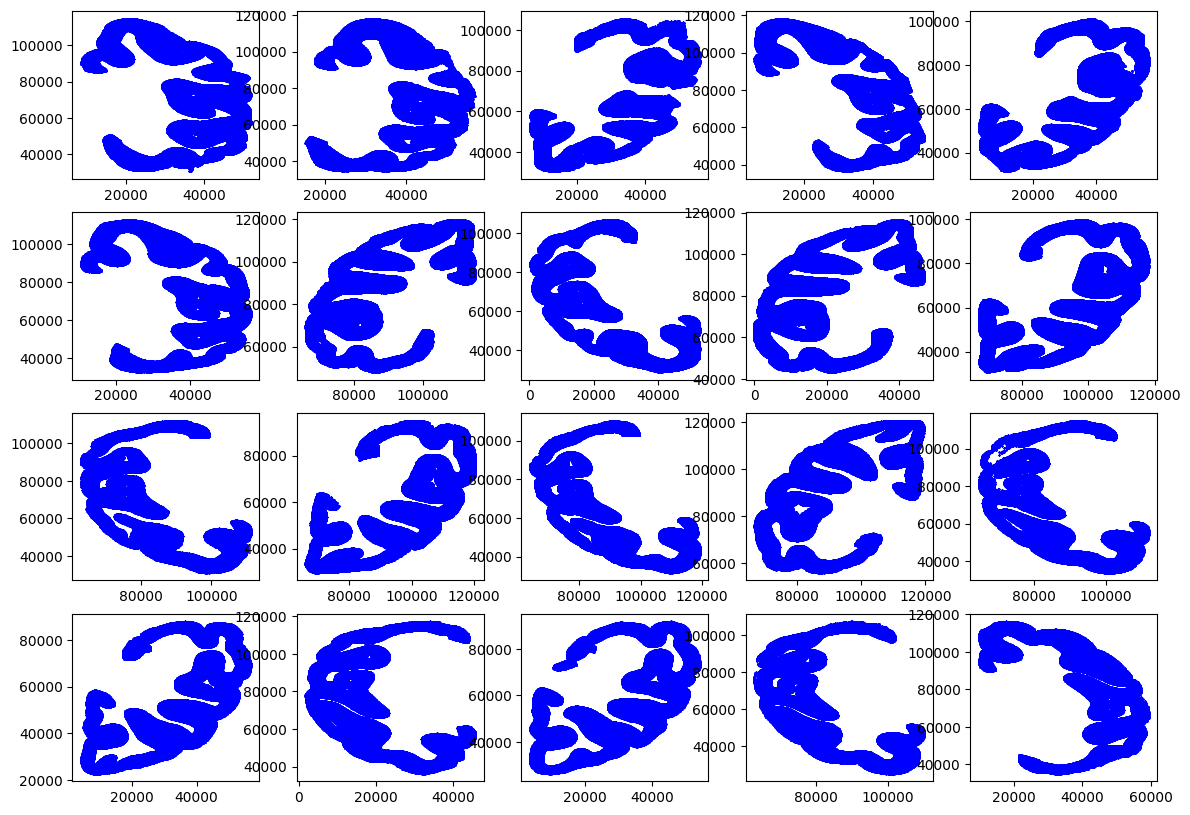

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 5, figsize=(14, 10))

for i, ax in enumerate(axs.flat):
    coo = pd.DataFrame(adatas[i].obsm['spatial'])
    ax.scatter(coo[0], coo[1], c='b', marker='x',s=1)

plt.show()